In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

In [2]:
#loading the dataset
invoice=pd.read_csv('H2HBABBA1048.csv')

In [3]:
#The dataset
invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200799367,MCL corporation,2019-06-20 00:00:00,2019.0,1.929428e+09,2019-06-04,20190604,20190604,20190619.0,USD,RV,1.0,NaN,56773.46,20190604.0,NAA8,1.929428e+09,0
1,U001,0100001196,DOLLAR trust,NaN,2020.0,1.930821e+09,2020-04-24,20200423,20200424,20200509.0,USD,RV,1.0,NaN,45157.12,20200424.0,NAA8,1.930821e+09,1
2,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930861e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,3882.90,20200507.0,NAH4,1.930861e+09,1
3,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930718e+09,2020-03-31,20200329,20200331,20200415.0,USD,RV,1.0,NaN,1898.90,20200331.0,NAH4,1.930718e+09,1
4,U001,0200186937,SYSC,2019-12-23 00:00:00,2019.0,1.930225e+09,2019-12-05,20191206,20191205,20191220.0,USD,RV,1.0,NaN,39819.64,20191205.0,NAA8,1.930225e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corp,2020-02-28 00:00:00,2020.0,1.930341e+09,2020-01-03,20200102,20200103,20200207.0,USD,RV,1.0,NaN,14178.24,20200103.0,NAG2,1.930341e+09,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930797e+09,2020-04-18,20200417,20200418,20200503.0,USD,RV,1.0,NaN,10315.02,20200418.0,NAH4,1.930797e+09,1
49997,U001,0200714710,SYSCO in,2019-08-27 00:00:00,2019.0,1.929702e+09,2019-08-06,20190804,20190806,20190826.0,USD,RV,1.0,NaN,47799.65,20190806.0,NAD1,1.929702e+09,0
49998,U001,0200696090,UNITE in,2019-04-08 00:00:00,2019.0,1.928987e+09,2019-03-22,20190318,20190322,20190406.0,USD,RV,1.0,NaN,3470.20,20190322.0,NAA8,1.928987e+09,0


In [4]:
#checking number of rows and columns inn the dataset
print(len(invoice.columns))
print(len(invoice.index))

19
50000


<AxesSubplot:>

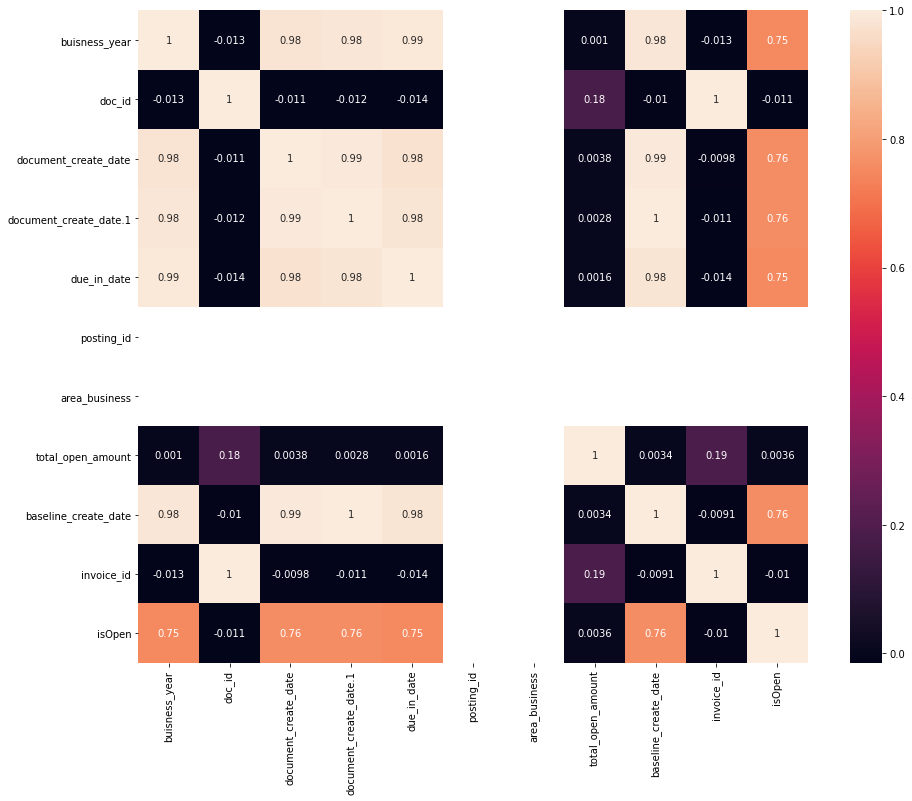

In [5]:
#checking correlation between all the columns of the data using heatmap to check for similar columns
plt.figure(figsize=(15,12))
sns.heatmap(invoice.corr(), annot = True)

In [6]:
#checkiing number of null values in each column
invoice.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
#correlation between document_create_date and document_create_date.1 is very high hence delete document_create_date.1
#and correlation between document_create_date and baseline_create_date is also greater than 0.99 hence dropping baseline_create_date too
invoice=invoice.drop(['document_create_date.1'],axis=1)
invoice=invoice.drop(['baseline_create_date'],axis=1)

#correlation between invoice_id and doc_id is 1 and invoice_id has 3 null values,so its oonly logical to drop invoice_id
invoice=invoice.drop(['invoice_id'],axis=1)

In [8]:
#dropping column with all null vaues i.e. area_buisness
invoice=invoice.dropna(axis=1,how="all")

In [9]:
invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,isOpen
0,U001,200799367,MCL corporation,2019-06-20 00:00:00,2019.0,1.929428e+09,2019-06-04,20190604,20190619.0,USD,RV,1.0,56773.46,NAA8,0
1,U001,0100001196,DOLLAR trust,NaN,2020.0,1.930821e+09,2020-04-24,20200423,20200509.0,USD,RV,1.0,45157.12,NAA8,1
2,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930861e+09,2020-05-07,20200506,20200522.0,USD,RV,1.0,3882.90,NAH4,1
3,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930718e+09,2020-03-31,20200329,20200415.0,USD,RV,1.0,1898.90,NAH4,1
4,U001,0200186937,SYSC,2019-12-23 00:00:00,2019.0,1.930225e+09,2019-12-05,20191206,20191220.0,USD,RV,1.0,39819.64,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corp,2020-02-28 00:00:00,2020.0,1.930341e+09,2020-01-03,20200102,20200207.0,USD,RV,1.0,14178.24,NAG2,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930797e+09,2020-04-18,20200417,20200503.0,USD,RV,1.0,10315.02,NAH4,1
49997,U001,0200714710,SYSCO in,2019-08-27 00:00:00,2019.0,1.929702e+09,2019-08-06,20190804,20190826.0,USD,RV,1.0,47799.65,NAD1,0
49998,U001,0200696090,UNITE in,2019-04-08 00:00:00,2019.0,1.928987e+09,2019-03-22,20190318,20190406.0,USD,RV,1.0,3470.20,NAA8,0


In [10]:
#posting_id and invoice_is were in float by default which is converted to integer

invoice['posting_id'] = invoice['posting_id'].apply(np.int64)
invoice['doc_id'] = invoice['doc_id'].apply(np.int64)

In [11]:
invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,isOpen
0,U001,200799367,MCL corporation,2019-06-20 00:00:00,2019.0,1929427790,2019-06-04,20190604,20190619.0,USD,RV,1,56773.46,NAA8,0
1,U001,0100001196,DOLLAR trust,NaN,2020.0,1930820686,2020-04-24,20200423,20200509.0,USD,RV,1,45157.12,NAA8,1
2,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1930861434,2020-05-07,20200506,20200522.0,USD,RV,1,3882.90,NAH4,1
3,U001,0200769623,WAL-MAR co,NaN,2020.0,1930718199,2020-03-31,20200329,20200415.0,USD,RV,1,1898.90,NAH4,1
4,U001,0200186937,SYSC,2019-12-23 00:00:00,2019.0,1930225484,2019-12-05,20191206,20191220.0,USD,RV,1,39819.64,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corp,2020-02-28 00:00:00,2020.0,1930341162,2020-01-03,20200102,20200207.0,USD,RV,1,14178.24,NAG2,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1930796966,2020-04-18,20200417,20200503.0,USD,RV,1,10315.02,NAH4,1
49997,U001,0200714710,SYSCO in,2019-08-27 00:00:00,2019.0,1929701518,2019-08-06,20190804,20190826.0,USD,RV,1,47799.65,NAD1,0
49998,U001,0200696090,UNITE in,2019-04-08 00:00:00,2019.0,1928987012,2019-03-22,20190318,20190406.0,USD,RV,1,3470.20,NAA8,0


In [12]:
#checking unique values in all the columns
invoice.nunique()

business_code               6
cust_number              1393
name_customer            4179
clear_date                395
buisness_year               2
doc_id                  48797
posting_date              501
document_create_date      504
due_in_date               550
invoice_currency            2
document type               2
posting_id                  1
total_open_amount       44107
cust_payment_terms         73
isOpen                      2
dtype: int64

In [13]:
#dropping the columns with only one unique value so posting_id would be deleted 
for x in invoice.columns:
    if(invoice[x].nunique()==1):
        invoice.drop([x],axis=1,inplace=True)

In [14]:
invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,200799367,MCL corporation,2019-06-20 00:00:00,2019.0,1929427790,2019-06-04,20190604,20190619.0,USD,RV,56773.46,NAA8,0
1,U001,0100001196,DOLLAR trust,NaN,2020.0,1930820686,2020-04-24,20200423,20200509.0,USD,RV,45157.12,NAA8,1
2,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1930861434,2020-05-07,20200506,20200522.0,USD,RV,3882.90,NAH4,1
3,U001,0200769623,WAL-MAR co,NaN,2020.0,1930718199,2020-03-31,20200329,20200415.0,USD,RV,1898.90,NAH4,1
4,U001,0200186937,SYSC,2019-12-23 00:00:00,2019.0,1930225484,2019-12-05,20191206,20191220.0,USD,RV,39819.64,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corp,2020-02-28 00:00:00,2020.0,1930341162,2020-01-03,20200102,20200207.0,USD,RV,14178.24,NAG2,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1930796966,2020-04-18,20200417,20200503.0,USD,RV,10315.02,NAH4,1
49997,U001,0200714710,SYSCO in,2019-08-27 00:00:00,2019.0,1929701518,2019-08-06,20190804,20190826.0,USD,RV,47799.65,NAD1,0
49998,U001,0200696090,UNITE in,2019-04-08 00:00:00,2019.0,1928987012,2019-03-22,20190318,20190406.0,USD,RV,3470.20,NAA8,0


In [15]:
#checcking the datatypes of all the columns
invoice.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                    int64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
document type            object
total_open_amount       float64
cust_payment_terms       object
isOpen                    int64
dtype: object

In [16]:
#Changing 'clear_date' column from string type to date time type 
invoice['clear_date'] = pd.to_datetime(invoice['clear_date'])

#Changing 'posting_date' column from string type to date time type 
invoice['posting_date'] = pd.to_datetime(invoice['posting_date'])

#Changing 'document_create_date' column from integer type to date time type 
invoice['document_create_date'] = pd.to_datetime(invoice['document_create_date'],format='%Y%m%d')

#Changing 'due_in_date' column from float type to date time type 
invoice['due_in_date'] = pd.to_datetime(invoice['due_in_date'],format='%Y%m%d')

#Changing 'buisness_year' column from float type to date time type 
invoice['buisness_year'] = pd.to_datetime(invoice['buisness_year'],format='%Y')
invoice['buisness_year'] = invoice['buisness_year'].dt.year

In [17]:
#verifying the changes made
invoice

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,200799367,MCL corporation,2019-06-20,2019,1929427790,2019-06-04,2019-06-04,2019-06-19,USD,RV,56773.46,NAA8,0
1,U001,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,USD,RV,45157.12,NAA8,1
2,U001,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,USD,RV,3882.90,NAH4,1
3,U001,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,USD,RV,1898.90,NAH4,1
4,U001,0200186937,SYSC,2019-12-23,2019,1930225484,2019-12-05,2019-12-06,2019-12-20,USD,RV,39819.64,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corp,2020-02-28,2020,1930341162,2020-01-03,2020-01-02,2020-02-07,USD,RV,14178.24,NAG2,0
49996,U001,0200769623,WAL-MAR,NaT,2020,1930796966,2020-04-18,2020-04-17,2020-05-03,USD,RV,10315.02,NAH4,1
49997,U001,0200714710,SYSCO in,2019-08-27,2019,1929701518,2019-08-06,2019-08-04,2019-08-26,USD,RV,47799.65,NAD1,0
49998,U001,0200696090,UNITE in,2019-04-08,2019,1928987012,2019-03-22,2019-03-18,2019-04-06,USD,RV,3470.20,NAA8,0


#### Converting every amount to same currency

In [18]:
#checking unique currencies
invoice['invoice_currency'].nunique()

2

In [19]:
#checking types of currencies
invoice['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [20]:
#value of total_open_amount in CAD currencies before converting all to USD
invoice[invoice['invoice_currency']=='CAD']['total_open_amount']

13       251366.34
15        14689.45
30        84254.42
36        11319.80
58        29975.52
           ...    
49966       988.53
49972     36721.26
49976      2788.10
49980      2029.58
49991     22173.52
Name: total_open_amount, Length: 3829, dtype: float64

In [21]:
#converting all the CAD to USD
for x in range(invoice.shape[0]):
    if(invoice.loc[x,'invoice_currency']=='CAD'):
        invoice.loc[x,'total_open_amount']*=0.81

In [22]:
#value of total_open_amount in CAD currencies after converting all to USD
invoice[invoice['invoice_currency']=='CAD']['total_open_amount']

13       203606.7354
15        11898.4545
30        68246.0802
36         9169.0380
58        24280.1712
            ...     
49966       800.7093
49972     29744.2206
49976      2258.3610
49980      1643.9598
49991     17960.5512
Name: total_open_amount, Length: 3829, dtype: float64

In [23]:
#dropping invoice_currency column because every currency is converted to USD
invoice.drop('invoice_currency',axis=1,inplace=True)

In [24]:
#dropping the columns in which a single value is repeating more than 90% of the time
for x in invoice.columns:
    if (
        (max(invoice.value_counts([x]))/len(invoice[x]))*100>=90
    ):
        invoice.drop(x,axis=1,inplace=True)

In [25]:
#verifying
invoice

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,200799367,MCL corporation,2019-06-20,2019,1929427790,2019-06-04,2019-06-04,2019-06-19,56773.46,NAA8,0
1,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8,1
2,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4,1
3,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4,1
4,0200186937,SYSC,2019-12-23,2019,1930225484,2019-12-05,2019-12-06,2019-12-20,39819.64,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,CCCA02,KRAFT corp,2020-02-28,2020,1930341162,2020-01-03,2020-01-02,2020-02-07,14178.24,NAG2,0
49996,0200769623,WAL-MAR,NaT,2020,1930796966,2020-04-18,2020-04-17,2020-05-03,10315.02,NAH4,1
49997,0200714710,SYSCO in,2019-08-27,2019,1929701518,2019-08-06,2019-08-04,2019-08-26,47799.65,NAD1,0
49998,0200696090,UNITE in,2019-04-08,2019,1928987012,2019-03-22,2019-03-18,2019-04-06,3470.20,NAA8,0


### Dividing Into main test with null clear dates and main train without null

In [26]:
invoice_main_train=invoice[~invoice.clear_date.isnull()]

invoice_main_test=invoice[invoice.clear_date.isnull()]

In [27]:
#isOpen column would be 0 in whole main train set because the amount is cleared and would be 1 in whole main test set because
#the amount is not cleared in main test so removing isOpen columns from both main train and main test because it would be 
#constant in both
invoice_main_train.drop('isOpen',axis=1,inplace=True)
invoice_main_test.drop('isOpen',axis=1,inplace=True)

In [28]:
#creating a target coluumn which is the delay in payment i.e. clear_date - due_in_date in main train
invoice_main_train['delay'] = invoice_main_train['clear_date'].sub(invoice_main_train['due_in_date'], axis=0)

In [29]:
#sorting by posting date so that the machine should not do any future predictions because new data would be provided for newer dates
invoice_main_train.sort_values(by=['posting_date'],inplace=True)

In [30]:
invoice_main_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay
36671,0200769623,WAL-MAR,2019-01-09,2019,1928540720,2018-12-30,2018-12-29,2019-01-14,13904.400,NAH4,-5 days
21523,0200148860,DOLLA co,2019-01-14,2019,1928540031,2018-12-30,2018-12-29,2019-01-14,98985.940,NAA8,0 days
48362,0200742521,GLA us,2019-01-10,2019,1928536588,2018-12-30,2018-12-29,2019-01-14,29413.020,NAA8,-4 days
18440,0200769623,WAL-MAR us,2019-01-11,2019,1928542642,2018-12-30,2018-12-30,2019-01-14,2518.660,NAH4,-3 days
40806,0200769623,WAL-MAR us,2019-01-09,2019,1928537977,2018-12-30,2018-12-29,2019-01-14,15802.320,NAH4,-5 days
...,...,...,...,...,...,...,...,...,...,...,...
48401,0100012638,99 CE corporation,2020-03-13,2020,1930566087,2020-02-26,2020-02-25,2020-03-12,41828.710,NAA8,1 days
39840,0200943275,US llc,2020-03-13,2020,1930580919,2020-02-27,2020-02-27,2020-03-13,37837.600,NAA8,0 days
47255,0200794332,COST llc,2020-03-12,2020,1930576873,2020-02-27,2020-02-27,2020-03-13,77997.490,NAAX,-1 days
19330,0200794332,COST trust,2020-03-12,2020,1930576768,2020-02-27,2020-02-27,2020-03-13,12610.490,NAAX,-1 days


In [31]:
invoice_main_test

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
1,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8
2,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4
3,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4
5,0200799367,MCL,NaT,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD
6,0200769623,WAL-MAR corporation,NaT,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4
...,...,...,...,...,...,...,...,...,...,...
49985,0200739534,OK us,NaT,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8
49987,0200769623,WAL-MAR co,NaT,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4
49988,0200790107,ROU corp,NaT,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6
49993,200759878,SA,NaT,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4


In [32]:
invoice_main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 36671 to 43565
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   cust_number           40000 non-null  object         
 1   name_customer         40000 non-null  object         
 2   clear_date            40000 non-null  datetime64[ns] 
 3   buisness_year         40000 non-null  int64          
 4   doc_id                40000 non-null  int64          
 5   posting_date          40000 non-null  datetime64[ns] 
 6   document_create_date  40000 non-null  datetime64[ns] 
 7   due_in_date           40000 non-null  datetime64[ns] 
 8   total_open_amount     40000 non-null  float64        
 9   cust_payment_terms    40000 non-null  object         
 10  delay                 40000 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 3.7+ MB


In [33]:
#converting delay to ineger type from timedelta type so that it can be put to model
invoice_main_train['delay'] = invoice_main_train['delay'].dt.days.apply(np.int64)

### Data Split

In [34]:
# Converting the invoice_main_train into X and y so that we can pass it onto train_test_split function

# X contains the dataframe without the target variable i.e. delay because it has to be prdicted
X = invoice_main_train.drop('delay',axis=1)

# y contains only the target variable
y = invoice_main_train['delay']

In [35]:
#checking the shapes after partition
X.shape,y.shape

((40000, 10), (40000,))

In [36]:
#splitting the data first into two parts
#doing a 75:25 split i.e 25% data fed to test data
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.25,random_state=0 , shuffle = False)

In [37]:
#splitting the intermediate test set to test and vaidation set
# doing a 50:50 distribution among them
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [38]:
X_train.shape , X_val.shape , X_test.shape,y_train.shape , y_val.shape , y_test.shape

((30000, 10), (5000, 10), (5000, 10), (30000,), (5000,), (5000,))

In [39]:
X_train['total_open_amount'].describe()

count     30000.000000
mean      30610.841544
std       36763.500870
min           1.070000
25%        4527.090000
50%       16597.315000
75%       44674.518975
max      749046.690000
Name: total_open_amount, dtype: float64

<AxesSubplot:>

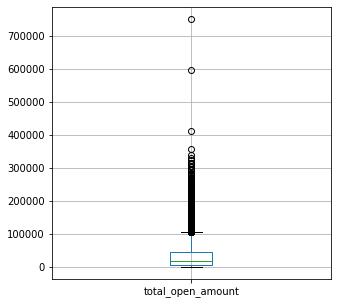

In [40]:
# checking for outliers using box-plot
plt.figure(figsize=(5,5))
X_train['total_open_amount'].plot.box(grid='True')

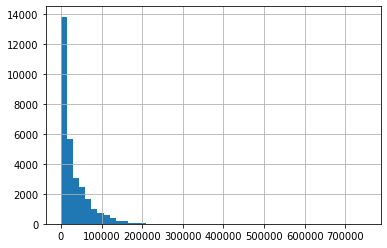

In [41]:
#checking skewness of 'total_open_amount'
#right skewed
figure=X_train['total_open_amount'].hist(bins=50)

In [42]:
#calculating skewness of 'total_open_amount'
print(X_train['total_open_amount'].skew())

2.3927928069806716


In [43]:
#computing the Interquantile range to calculate the boundaries
IQR=X_train['total_open_amount'].quantile(0.75)-X_train['total_open_amount'].quantile(0.25)

In [44]:
#computing lower bridge and upper bridge for outliers
lower_bridge=X_train['total_open_amount'].quantile(0.25)-(IQR*1.5)
upper_bridge=X_train['total_open_amount'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-55694.0534625
104895.6624375


(None, None)

In [45]:
#### Computing Extreme outliers
lower_bridge=X_train['total_open_amount'].quantile(0.25)-(IQR*3)
upper_bridge=X_train['total_open_amount'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-115915.19692500001
165116.8059


(None, None)

In [46]:
#changing extreme outliers into upper_bridge balue of IQR so that it becomes less skewed
X_train.loc[X_train['total_open_amount']>=165116.8059,'total_open_amount']=165116.8059

In [47]:
#calculating skewness of 'total_open_amount' again
#skewness has decreased by some amount
print(X_train['total_open_amount'].skew())

1.6787128874296495


<AxesSubplot:>

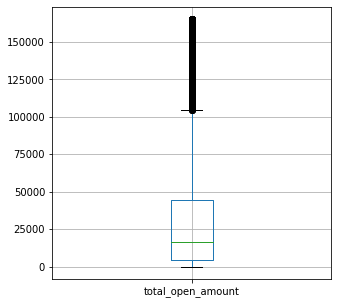

In [48]:
#visualising outliers left using boxplot
plt.figure(figsize=(5,5))
X_train['total_open_amount'].plot.box(grid='True')

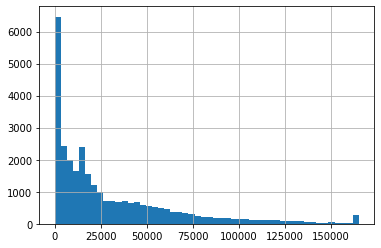

In [49]:
#checking skewness of 'total_open_amount' after treating outliers
figure=X_train['total_open_amount'].hist(bins=50)

In [50]:
X_train['total_open_amount'].describe()

count     30000.000000
mean      30265.833836
std       34846.452981
min           1.070000
25%        4527.090000
50%       16597.315000
75%       44674.518975
max      165116.805900
Name: total_open_amount, dtype: float64

<AxesSubplot:xlabel='delay', ylabel='Density'>

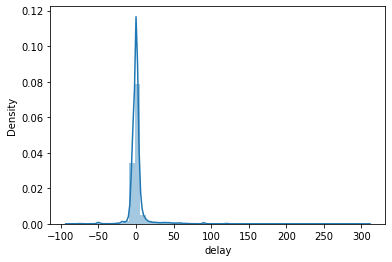

In [51]:
#visualising skewness of delay
sns.distplot(y_train)

### Data Visualisation

In [52]:
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
36671,0200769623,WAL-MAR,2019-01-09,2019,1928540720,2018-12-30,2018-12-29,2019-01-14,13904.40,NAH4
21523,0200148860,DOLLA co,2019-01-14,2019,1928540031,2018-12-30,2018-12-29,2019-01-14,98985.94,NAA8
48362,0200742521,GLA us,2019-01-10,2019,1928536588,2018-12-30,2018-12-29,2019-01-14,29413.02,NAA8
18440,0200769623,WAL-MAR us,2019-01-11,2019,1928542642,2018-12-30,2018-12-30,2019-01-14,2518.66,NAH4
40806,0200769623,WAL-MAR us,2019-01-09,2019,1928537977,2018-12-30,2018-12-29,2019-01-14,15802.32,NAH4
...,...,...,...,...,...,...,...,...,...,...
31970,0200759878,SA,2019-11-12,2019,1930054156,2019-10-27,2019-10-26,2019-11-11,65687.25,NAH4
38316,0200769623,WAL-MAR corp,2019-11-06,2019,1930055185,2019-10-27,2019-10-26,2019-11-11,36201.42,NAH4
9217,0200769623,WAL-MAR systems,2019-11-06,2019,1930056462,2019-10-27,2019-10-28,2019-11-11,5137.26,NAH4
23226,0200726979,BJ'S us,2019-11-12,2019,1930071062,2019-10-27,2019-10-29,2019-11-11,552.15,NAA8


In [53]:
y_train

36671    -5
21523     0
48362    -4
18440    -3
40806    -5
         ..
31970     1
38316    -5
9217     -5
23226     1
8324     25
Name: delay, Length: 30000, dtype: int64

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

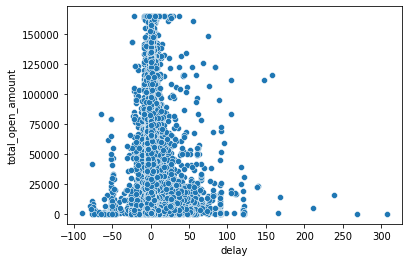

In [54]:
#Visualising delay according to amount
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

### Insights
Delay remains between -50 to 50 days for most og the time for all amounts

Text(0.5, 1.0, 'Day Of Payment')

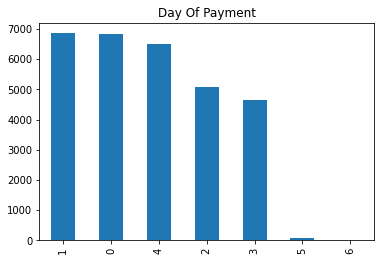

In [55]:
#Plotting the day wise number of payments cleared during each week
X_train['clear_date'].dt.weekday.value_counts().plot(kind='bar').set_title('Day Of Payment')

##  Insights
Most of the patments are done on tuesdays and then monday and as the week approaches to end number of payments decline.

Text(0.5, 1.0, 'Month Of Payment')

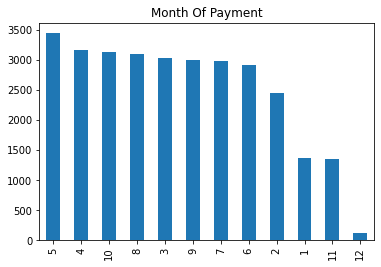

In [56]:
#Plotting the day wise number of payments cleared during each week
X_train['clear_date'].dt.month.value_counts().plot(kind='bar').set_title('Month Of Payment')

## Insights
Most of the payment is done in the month of may and least is done in december.

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 36671 to 8324
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           30000 non-null  object        
 1   name_customer         30000 non-null  object        
 2   clear_date            30000 non-null  datetime64[ns]
 3   buisness_year         30000 non-null  int64         
 4   doc_id                30000 non-null  int64         
 5   posting_date          30000 non-null  datetime64[ns]
 6   document_create_date  30000 non-null  datetime64[ns]
 7   due_in_date           30000 non-null  datetime64[ns]
 8   total_open_amount     30000 non-null  float64       
 9   cust_payment_terms    30000 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 2.5+ MB


### Feature Engineering

In [58]:
#Applying a label encoder for cust_number because it is of type object
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.fit_transform(X_train['cust_number'])

In [59]:
#checking encoded values
X_train[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
36671,744,0200769623
21523,416,0200148860
48362,685,0200742521
18440,744,0200769623
40806,744,0200769623
...,...,...
31970,721,0200759878
38316,744,0200769623
9217,744,0200769623
23226,652,0200726979


In [60]:
#applying same encoder to validation and test set
X_val['cust_number_enc'] = cust_number_encoder.fit_transform(X_val['cust_number'])
X_test['cust_number_enc'] = cust_number_encoder.fit_transform(X_test['cust_number'])

In [61]:
# function will delete a column from train , val and test
def delete_column(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [62]:
#delete cust_number from train test and val because encoded values are already there
X_train ,X_val, X_test = delete_column(['cust_number'])

In [63]:
#Applying a label encoder for name_customer because it is of type object

name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

In [64]:
X_val['name_customer_enc'] = cust_number_encoder.fit_transform(X_val['name_customer'])
X_test['name_customer_enc'] = cust_number_encoder.fit_transform(X_test['name_customer'])

In [65]:
#delete name_customer from train test and val because encoded values are already there
X_train ,X_val, X_test = delete_column(['name_customer'])

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 36671 to 8324
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            30000 non-null  datetime64[ns]
 1   buisness_year         30000 non-null  int64         
 2   doc_id                30000 non-null  int64         
 3   posting_date          30000 non-null  datetime64[ns]
 4   document_create_date  30000 non-null  datetime64[ns]
 5   due_in_date           30000 non-null  datetime64[ns]
 6   total_open_amount     30000 non-null  float64       
 7   cust_payment_terms    30000 non-null  object        
 8   cust_number_enc       30000 non-null  int32         
 9   name_customer_enc     30000 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(2), int64(2), object(1)
memory usage: 2.3+ MB


In [67]:
#Applying a label encoder for cust_payment_terms_enc because it is of type object
from sklearn.preprocessing import LabelEncoder
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [68]:
X_val['cust_payment_terms_enc'] = cust_number_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_number_encoder.fit_transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = delete_column(['cust_payment_terms'])

In [70]:
#week day of due_in_date
#0 --> Monday , 6 --> Sunday
X_train['due_week'] = X_train['due_in_date'].dt.weekday 
X_val['due_week'] = X_val['due_in_date'].dt.weekday 
X_test['due_week'] = X_test['due_in_date'].dt.weekday

In [71]:
#extract day,month and year of due_in_date

X_train['due_day'] = X_train['due_in_date'].dt.day
X_train['due_month'] = X_train['due_in_date'].dt.month
X_train['due_year'] = X_train['due_in_date'].dt.year

X_val['due_day'] = X_val['due_in_date'].dt.day
X_val['due_month'] = X_val['due_in_date'].dt.month
X_val['due_year'] = X_val['due_in_date'].dt.year


X_test['due_day'] = X_test['due_in_date'].dt.day
X_test['due_month'] = X_test['due_in_date'].dt.month
X_test['due_year'] = X_test['due_in_date'].dt.year

In [72]:
#removing date columns from X_train because its of type datetime not int or float
X_train ,X_val, X_test = delete_column(['due_in_date'])

In [73]:
#extract weekday,day,month and year of posting_date
X_train['posting_week'] = X_train['posting_date'].dt.weekday 
X_val['posting_week'] = X_val['posting_date'].dt.weekday 
X_test['posting_week'] = X_test['posting_date'].dt.weekday

X_train['posting_day'] = X_train['posting_date'].dt.day
X_train['posting_month'] = X_train['posting_date'].dt.month
X_train['posting_year'] = X_train['posting_date'].dt.year

X_val['posting_day'] = X_val['posting_date'].dt.day
X_val['posting_month'] = X_val['posting_date'].dt.month
X_val['posting_year'] = X_val['posting_date'].dt.year


X_test['posting_day'] = X_test['posting_date'].dt.day
X_test['posting_month'] = X_test['posting_date'].dt.month
X_test['posting_year'] = X_test['posting_date'].dt.year

In [74]:
X_train ,X_val, X_test = delete_column(['posting_date'])

In [75]:
#extract weekday,day,month and year of document_create_date

X_train['document_create_week'] = X_train['document_create_date'].dt.weekday 
X_val['document_create_week'] = X_val['document_create_date'].dt.weekday 
X_test['document_create_week'] = X_test['document_create_date'].dt.weekday

X_train['document_create_day'] = X_train['document_create_date'].dt.day
X_train['document_create_month'] = X_train['document_create_date'].dt.month
X_train['document_create_year'] = X_train['document_create_date'].dt.year

X_val['document_create_day'] = X_val['document_create_date'].dt.day
X_val['document_create_month'] = X_val['document_create_date'].dt.month
X_val['document_create_year'] = X_val['document_create_date'].dt.year


X_test['document_create_day'] = X_test['document_create_date'].dt.day
X_test['document_create_month'] = X_test['document_create_date'].dt.month
X_test['document_create_year'] = X_test['document_create_date'].dt.year

In [76]:
X_train ,X_val, X_test = delete_column(['document_create_date'])

In [77]:
#removing clear_date as it would not be present in data provided in real world and it is to be calculated using due date and 
#delay in ML model. Hence clear date will not go in model
X_train ,X_val, X_test = delete_column(['clear_date'])

### Removing Constant Columns

In [78]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to apply this filter to our training set
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

17

In [79]:
#printing the number of constant columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

1


In [80]:
#the constant columns list
constant_columns

['buisness_year']

In [81]:
#removing the constant column
X_train ,X_val, X_test = delete_column(['buisness_year'])

### Remove Duplicate Features

In [82]:
# transpose the train set
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


In [83]:
#no duplicate feature

## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

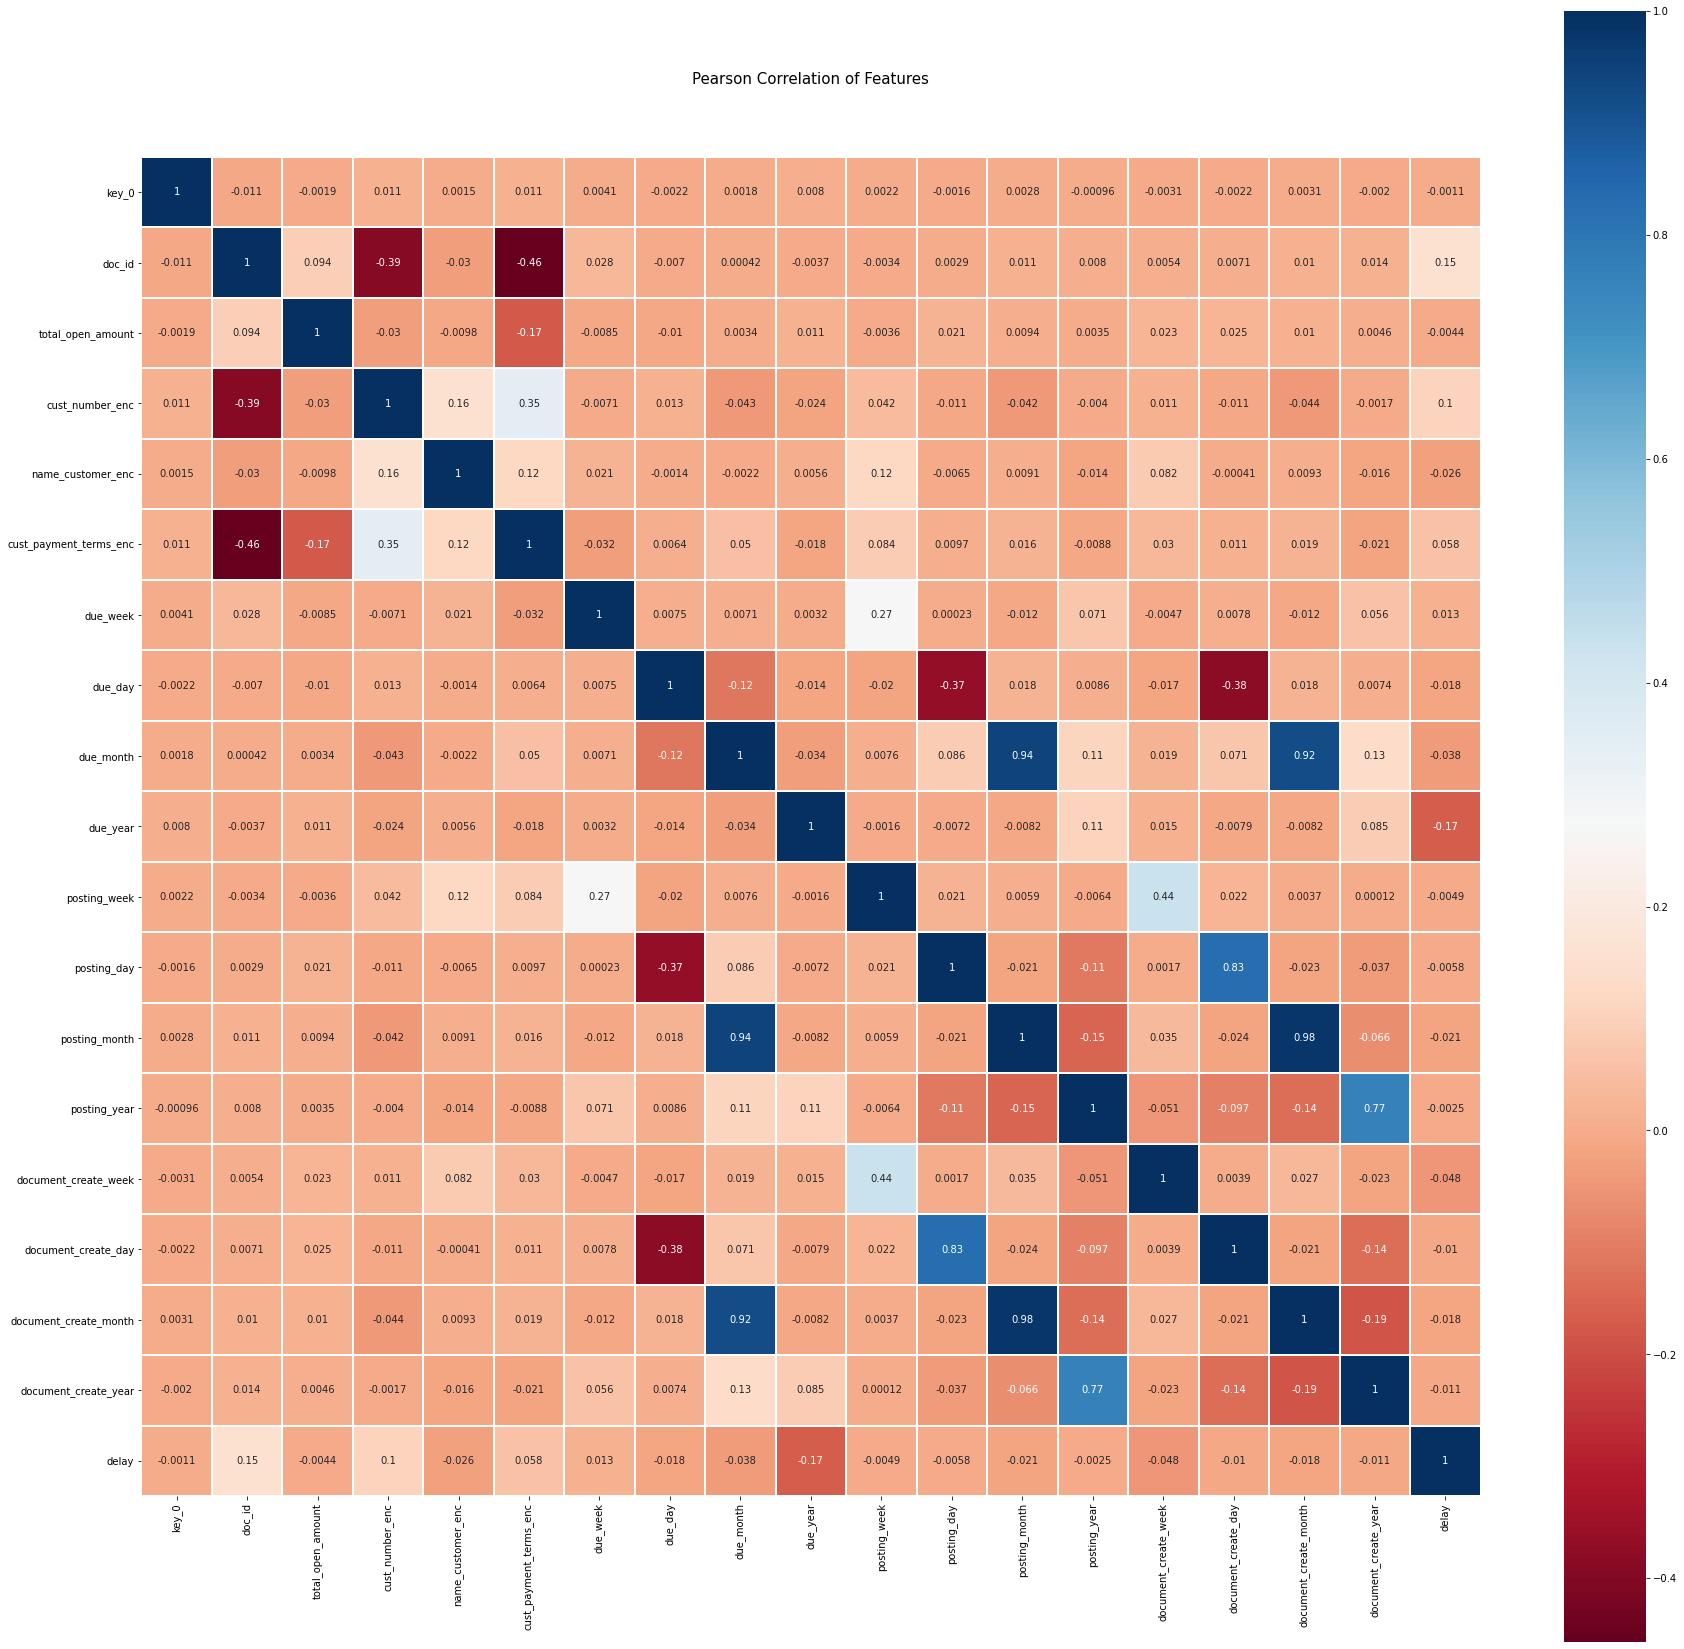

In [84]:
#visualising correlation betwen features made using pearson correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [85]:
#defining a function to return a list of features which has correlation greater than the threshold provided
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [86]:
#getting a list of correlatedd features with correlation greater than 0.7
correlated=handling_correlation(X_train.copy(),0.70)

In [87]:
#list of correlated features 
correlated

['document_create_month',
 'posting_month',
 'document_create_day',
 'document_create_year']

In [88]:
#deleting the correlated features
X_train ,X_val, X_test = delete_column(correlated)

In [89]:
#removing doc_id as id would be unique for every onne and would be unique for the new data that would be provided for prediction
#hence it would nnot be useful for training the model
X_train ,X_val, X_test = delete_column(['doc_id'])

In [90]:
X_train

,total_open_amount,cust_number_enc,name_customer_enc,cust_payment_terms_enc,due_week,due_day,due_month,due_year,posting_week,posting_day,posting_year,document_create_week
36671,13904.40,744,3319,34,0,14,1,2019,6,30,2018,5
21523,98985.94,416,878,20,0,14,1,2019,6,30,2018,5
48362,29413.02,685,1210,20,0,14,1,2019,6,30,2018,5
18440,2518.66,744,3329,34,0,14,1,2019,6,30,2018,6
40806,15802.32,744,3329,34,0,14,1,2019,6,30,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...
31970,65687.25,721,2659,34,0,11,11,2019,6,27,2019,5
38316,36201.42,744,3322,34,0,11,11,2019,6,27,2019,5
9217,5137.26,744,3327,34,0,11,11,2019,6,27,2019,0
23226,552.15,652,360,20,0,11,11,2019,6,27,2019,1


In [91]:
X_val

,total_open_amount,cust_number_enc,name_customer_enc,cust_payment_terms_enc,due_week,due_day,due_month,due_year,posting_week,posting_day,posting_year,document_create_week
14521,13646.45,322,963,19,0,11,11,2019,6,27,2019,4
4123,15483.56,336,1250,19,0,11,11,2019,6,27,2019,5
43183,353.11,275,131,9,0,11,11,2019,6,27,2019,1
44700,28769.84,336,1253,19,0,11,11,2019,6,27,2019,5
29961,575.60,336,1256,19,0,11,11,2019,6,27,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...
30670,6975.42,324,484,9,4,17,1,2020,3,2,2020,2
6613,552.55,147,492,9,4,17,1,2020,3,2,2020,3
47386,28552.58,316,56,9,4,17,1,2020,3,2,2020,0
26883,991.98,260,1121,5,0,3,2,2020,3,2,2020,1


## Linear Regression Model

In [92]:
#applying a linear regression model
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [93]:
#predicting values on validation set
y_predict = base_model.predict(X_val)

In [94]:
#calculatin RMSE of linear regression on validation set
#RMSE of linear regression is very high
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

32.79521932148339

In [95]:
#predicted values
y_predict

array([  -1.80161622,   -2.16451489,   -1.10375984, ..., -102.05472666,
       -103.17485427, -103.04288522])

## Decision Tree regression Model

In [96]:
#importing libraries for Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=2, min_samples_split=2)

In [97]:
#fitting the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [98]:
#predicting the model on validation set
y_predict2 = regressor.predict(X_val)

In [99]:
#calucating RMSE value for validation set
mean_squared_error(y_val, y_predict2, squared=False)

6.360462809318287

In [100]:
#predicting values on validation set
y_predict_test = regressor.predict(X_test)
#calculating RMSE value
mean_squared_error(y_test, y_predict_test, squared=False)

10.441678380358583

## Random Forest regression

In [101]:
#defining a function to calculate importances of features in the random forrest regression model
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor()

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

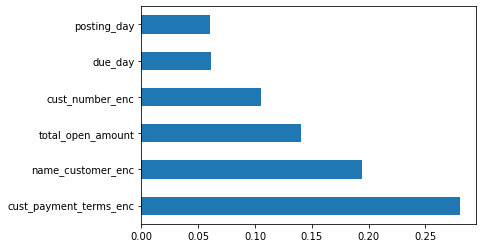

In [102]:
#visualising feature importances
feature_importance=tree_based_feature_importance(X_train,y_train)

In [103]:
#displaying feature importances in tabular form
display(feature_importance)

,Features,Importances
3,cust_payment_terms_enc,0.280602
2,name_customer_enc,0.194245
0,total_open_amount,0.140215
1,cust_number_enc,0.105461
5,due_day,0.061620
9,posting_day,0.060544
7,due_year,0.045020
6,due_month,0.037305
11,document_create_week,0.032547
4,due_week,0.022348


In [104]:
#dropping features having low importance
X_train ,X_val, X_test = delete_column(['posting_year','document_create_week','due_week','posting_week'])

In [105]:
#importing libraries for random forest regression
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators=100)
  
# fit the regressor with x and y data
regressor1.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
#predicting on validation set
y_predict3 = regressor1.predict(X_val)

In [107]:
#RMSE value of validation set
mean_squared_error(y_val, y_predict3, squared=False)

12.282692034729195

In [108]:
#RMSE value of test set
y_predict_test = regressor1.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

13.983292676222181

## Support vector regression

In [109]:
#importing libraries for SVR
from sklearn.svm import SVR

In [110]:
#fitting the model
regressionSVM = SVR()
regressionSVM.fit(X_train, y_train)

SVR()

In [111]:
# Predicting the Validation Set Results
predictedSVM = regressionSVM.predict(X_val)

In [112]:
#RMSE value on validation set
mean_squared_error(y_val, predictedSVM,squared=False)

6.337939833830015

In [113]:
# Predicting the Test Set Results
predictedSVM = regressionSVM.predict(X_test)

In [114]:
#RMSE value on test set
mean_squared_error(y_test, predictedSVM,squared=False)

10.444619876010687

# Time for predicting on main test set

### Random forest Regression model is chosed due to its low mean squared error in validation and test set and low difference between RMSE of validation and test implying model is not overfitting

In [115]:
#checkinng out the main test set
invoice_main_test

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
1,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8
2,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4
3,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4
5,0200799367,MCL,NaT,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD
6,0200769623,WAL-MAR corporation,NaT,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4
...,...,...,...,...,...,...,...,...,...,...
49985,0200739534,OK us,NaT,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8
49987,0200769623,WAL-MAR co,NaT,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4
49988,0200790107,ROU corp,NaT,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6
49993,200759878,SA,NaT,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4


In [116]:
#the train set
#have to make the test set similar to train
X_train

,total_open_amount,cust_number_enc,name_customer_enc,cust_payment_terms_enc,due_day,due_month,due_year,posting_day
36671,13904.40,744,3319,34,14,1,2019,30
21523,98985.94,416,878,20,14,1,2019,30
48362,29413.02,685,1210,20,14,1,2019,30
18440,2518.66,744,3329,34,14,1,2019,30
40806,15802.32,744,3329,34,14,1,2019,30
...,...,...,...,...,...,...,...,...
31970,65687.25,721,2659,34,11,11,2019,27
38316,36201.42,744,3322,34,11,11,2019,27
9217,5137.26,744,3327,34,11,11,2019,27
23226,552.15,652,360,20,11,11,2019,27


### Need to convert main test exactly as training set used for training the model

In [117]:
#creating a copy of main test
testing=invoice_main_test.copy()

In [118]:
testing

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms
1,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8
2,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4
3,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4
5,0200799367,MCL,NaT,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD
6,0200769623,WAL-MAR corporation,NaT,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4
...,...,...,...,...,...,...,...,...,...,...
49985,0200739534,OK us,NaT,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8
49987,0200769623,WAL-MAR co,NaT,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4
49988,0200790107,ROU corp,NaT,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6
49993,200759878,SA,NaT,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4


### encoding cust_number, name_customer_enc, cust_payment_terms with the same encoder used for train set and putting same column name in testing

In [119]:
testing['cust_number_enc'] = cust_number_encoder.fit_transform(testing['cust_number'])

In [120]:
testing['name_customer_enc'] = name_customer_encoder.fit_transform(testing['name_customer'])

In [121]:
testing['cust_payment_terms_enc'] = cust_payment_terms_encoder.fit_transform(testing['cust_payment_terms'])

In [122]:
#checking train set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 36671 to 8324
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_open_amount       30000 non-null  float64
 1   cust_number_enc         30000 non-null  int32  
 2   name_customer_enc       30000 non-null  int32  
 3   cust_payment_terms_enc  30000 non-null  int32  
 4   due_day                 30000 non-null  int64  
 5   due_month               30000 non-null  int64  
 6   due_year                30000 non-null  int64  
 7   posting_day             30000 non-null  int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 2.7 MB


### converting the test set columns in same format as in training set

In [123]:
testing['due_day'] = testing['due_in_date'].dt.day

In [124]:
testing['due_month'] = testing['due_in_date'].dt.month

In [125]:
testing['due_year'] = testing['due_in_date'].dt.year

In [126]:
testing['posting_day'] = testing['posting_date'].dt.year

In [127]:
#defining a function for deleting columns from testing which is not in train set
for x in testing.columns:
    if x not in X_train.columns:
        testing.drop(x,axis=1,inplace=True)

In [128]:
testing

,total_open_amount,cust_number_enc,name_customer_enc,cust_payment_terms_enc,due_day,due_month,due_year,posting_day
1,45157.12,5,468,13,9,5,2020,2020
2,3882.90,386,1687,24,22,5,2020,2020
3,1898.90,386,1685,24,15,4,2020,2020
5,9571.85,442,961,23,8,5,2020,2020
6,790.07,386,1687,24,10,5,2020,2020
...,...,...,...,...,...,...,...,...
49985,34697.08,337,1091,13,23,4,2020,2020
49987,97989.05,386,1685,24,20,4,2020,2020
49988,43679.18,424,1283,18,24,3,2020,2020
49993,13042.11,589,1293,24,1,4,2020,2020


In [129]:
#prediction on main test set
test_prediction = regressor1.predict(testing)

In [130]:
#predicted values
test_prediction

array([-8.36,  5.73,  3.99, ..., -2.86, -6.61,  7.76])

In [131]:
#converting predicted values to pandas series
final_result = pd.Series(test_prediction,name='delay')

In [132]:
#converting delay to integer from float
final_result=final_result.astype(int)

In [133]:
final_result

0      -8
1       5
2       3
3      -3
4       5
       ..
9995   -3
9996   -2
9997   -2
9998   -6
9999    7
Name: delay, Length: 10000, dtype: int32

In [134]:
# resetting the index of main test so that we can merge delay series with it
invoice_main_test.reset_index(drop=True,inplace=True)

In [135]:
#merge prediction with invoice table
Model = invoice_main_test.merge(final_result , on = testing.index )

In [136]:
Model

,key_0,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay
0,1,0100001196,DOLLAR trust,NaT,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8,-8
1,2,0200769623,WAL-MAR corporation,NaT,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4,5
2,3,0200769623,WAL-MAR co,NaT,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4,3
3,5,0200799367,MCL,NaT,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD,-3
4,6,0200769623,WAL-MAR corporation,NaT,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49985,0200739534,OK us,NaT,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8,-3
9996,49987,0200769623,WAL-MAR co,NaT,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4,-2
9997,49988,0200790107,ROU corp,NaT,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6,-2
9998,49993,200759878,SA,NaT,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4,-6


In [137]:
### calculating clear date after delay prediction by adding delay to due date

In [138]:
Model['clear_date'] = Model['due_in_date'] + pd.to_timedelta(Model['delay'], unit='d')

In [139]:
Model

,key_0,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay
0,1,0100001196,DOLLAR trust,2020-05-01,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8,-8
1,2,0200769623,WAL-MAR corporation,2020-05-27,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4,5
2,3,0200769623,WAL-MAR co,2020-04-18,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4,3
3,5,0200799367,MCL,2020-05-05,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD,-3
4,6,0200769623,WAL-MAR corporation,2020-05-15,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49985,0200739534,OK us,2020-04-20,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8,-3
9996,49987,0200769623,WAL-MAR co,2020-04-18,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4,-2
9997,49988,0200790107,ROU corp,2020-03-22,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6,-2
9998,49993,200759878,SA,2020-03-26,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4,-6


### Assigning buckets

#### delay <=-5 Bucket A

#### -5< delay <=5 Bucket B

#### 5< delay <=15 Bucket C

#### 15< delay <=25 Bucket D

#### 25< delay Bucket E

In [140]:
#assigning invoices to buckets
for x in range(len(Model['delay'])):
    if (Model.loc[x,'delay'] <= -5):
        Model.loc[x,'delay']='A'
    elif (Model.loc[x,'delay']>-5 and Model.loc[x,'delay']<=5):
        Model.loc[x,'delay']='B'
    elif (Model.loc[x,'delay']>5 and Model.loc[x,'delay']<=15):
        Model.loc[x,'delay']='C'
    elif (Model.loc[x,'delay']>15 and Model.loc[x,'delay']<=25):
        Model.loc[x,'delay']='D'
    elif (Model.loc[x,'delay']>25):
        Model.loc[x,'delay']='E'

In [141]:
#converting delay to bucket as clearing date is calculated and now there is no need for deelay and delay column is changed
#to bucket in which the invoice falls
Model.rename(columns={"delay":"Bucket"},inplace=True)

In [142]:
#Final dataframe with predicted clear date and bucket
Model

,key_0,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,Bucket
0,1,0100001196,DOLLAR trust,2020-05-01,2020,1930820686,2020-04-24,2020-04-23,2020-05-09,45157.12,NAA8,A
1,2,0200769623,WAL-MAR corporation,2020-05-27,2020,1930861434,2020-05-07,2020-05-06,2020-05-22,3882.90,NAH4,B
2,3,0200769623,WAL-MAR co,2020-04-18,2020,1930718199,2020-03-31,2020-03-29,2020-04-15,1898.90,NAH4,B
3,5,0200799367,MCL,2020-05-05,2020,1930598543,2020-03-04,2020-03-04,2020-05-08,9571.85,NAGD,B
4,6,0200769623,WAL-MAR corporation,2020-05-15,2020,1930823091,2020-04-25,2020-04-24,2020-05-10,790.07,NAH4,B
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49985,0200739534,OK us,2020-04-20,2020,1930760195,2020-04-08,2020-04-08,2020-04-23,34697.08,NAA8,B
9996,49987,0200769623,WAL-MAR co,2020-04-18,2020,1930750043,2020-04-05,2020-04-04,2020-04-20,97989.05,NAH4,B
9997,49988,0200790107,ROU corp,2020-03-22,2020,1930620523,2020-03-09,2020-03-07,2020-03-24,43679.18,NAC6,B
9998,49993,200759878,SA,2020-03-26,2020,1930652501,2020-03-17,2020-03-14,2020-04-01,13042.11,NAH4,A


# The Clear date is predicted and invoices is put into corresponding buckets

In [143]:
Final_Model=Model[['name_customer','cust_number','doc_id','total_open_amount','due_in_date','clear_date']]

In [144]:
Final_Model

,name_customer,cust_number,doc_id,total_open_amount,due_in_date,clear_date
0,DOLLAR trust,0100001196,1930820686,45157.12,2020-05-09,2020-05-01
1,WAL-MAR corporation,0200769623,1930861434,3882.90,2020-05-22,2020-05-27
2,WAL-MAR co,0200769623,1930718199,1898.90,2020-04-15,2020-04-18
3,MCL,0200799367,1930598543,9571.85,2020-05-08,2020-05-05
4,WAL-MAR corporation,0200769623,1930823091,790.07,2020-05-10,2020-05-15
...,...,...,...,...,...,...
9995,OK us,0200739534,1930760195,34697.08,2020-04-23,2020-04-20
9996,WAL-MAR co,0200769623,1930750043,97989.05,2020-04-20,2020-04-18
9997,ROU corp,0200790107,1930620523,43679.18,2020-03-24,2020-03-22
9998,SA,200759878,1930652501,13042.11,2020-04-01,2020-03-26


In [145]:
Final_Model.rename(columns={"doc_id":"invoice_id","total_open_amount":"Amount","due_in_date":"due_date","clear_date":"predicted_date"},inplace=True)

In [146]:
Final_Model

,name_customer,cust_number,invoice_id,Amount,due_date,predicted_date
0,DOLLAR trust,0100001196,1930820686,45157.12,2020-05-09,2020-05-01
1,WAL-MAR corporation,0200769623,1930861434,3882.90,2020-05-22,2020-05-27
2,WAL-MAR co,0200769623,1930718199,1898.90,2020-04-15,2020-04-18
3,MCL,0200799367,1930598543,9571.85,2020-05-08,2020-05-05
4,WAL-MAR corporation,0200769623,1930823091,790.07,2020-05-10,2020-05-15
...,...,...,...,...,...,...
9995,OK us,0200739534,1930760195,34697.08,2020-04-23,2020-04-20
9996,WAL-MAR co,0200769623,1930750043,97989.05,2020-04-20,2020-04-18
9997,ROU corp,0200790107,1930620523,43679.18,2020-03-24,2020-03-22
9998,SA,200759878,1930652501,13042.11,2020-04-01,2020-03-26


In [147]:
Final_Model.to_csv('Final_Model.csv', index=False)